In [346]:
import pandas as pd
weather = pd.read_csv("durres_weather.csv", index_col="datetime")
weather['tempmax'] = weather['tempmax'].astype('float32')
weather['tempmin'] = weather['tempmin'].astype('float32')

In [347]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,durres,15.0,4.0,9.0,15.0,2.8,8.3,5.1,78.0,6.990,...,6.4,3,NaN,2021-01-01T07:08:14,2021-01-01T16:23:38,0.58,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"13615099999,13624099999,13611099999,LATI,13601..."
2021-01-02,durres,17.5,2.5,10.0,17.5,-0.9,9.3,2.6,62.9,0.400,...,7.5,4,NaN,2021-01-02T07:08:18,2021-01-02T16:24:30,0.62,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"13615099999,13624099999,13611099999,LATI,13601..."
2021-01-03,durres,18.0,7.5,12.2,18.0,6.1,11.8,7.2,73.2,1.992,...,7.0,4,NaN,2021-01-03T07:08:21,2021-01-03T16:25:23,0.65,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"13615099999,13624099999,13611099999,LATI,13601..."
2021-01-04,durres,13.0,7.0,10.3,13.0,5.3,9.7,7.1,80.9,5.038,...,2.7,2,NaN,2021-01-04T07:08:21,2021-01-04T16:26:18,0.69,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"13615099999,13624099999,13611099999,LATI,13601..."
2021-01-05,durres,14.3,5.0,10.3,14.3,2.8,9.5,5.5,73.3,7.973,...,6.9,4,NaN,2021-01-05T07:08:19,2021-01-05T16:27:15,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"13615099999,13624099999,13611099999,LATI,13601..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,durres,35.0,21.0,27.8,39.8,21.0,29.0,19.8,64.7,0.000,...,24.2,9,10.0,2023-08-27T06:03:00,2023-08-27T19:24:00,0.38,Clear,Clear conditions throughout the day.,clear-day,"13615099999,13624099999,13611099999,LATI,13601..."
2023-08-28,durres,36.0,21.0,27.9,39.2,21.0,29.5,20.5,66.8,0.000,...,24.4,9,15.0,2023-08-28T06:04:01,2023-08-28T19:22:24,0.41,Clear,Clear conditions throughout the day.,clear-day,"13615099999,13624099999,13611099999,LATI,13601..."
2023-08-29,durres,30.0,21.0,26.0,31.1,21.0,26.2,18.4,65.7,6.960,...,23.1,8,60.0,2023-08-29T06:05:01,2023-08-29T19:20:48,0.44,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"13615099999,13624099999,13611099999,LATI,13601..."


In [348]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [349]:
valid_columns = weather.columns[null_pct < 0.05]

In [350]:
valid_columns

Index(['name', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [351]:
weather = weather[valid_columns].copy()
weather = weather.ffill()

In [352]:
weather.dtypes

name                 object
tempmax             float32
tempmin             float32
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [353]:
weather.index = pd.to_datetime(weather.index)

In [354]:
weather.index.year.value_counts().sort_index()

datetime
2021    365
2022    365
2023    243
Name: count, dtype: int64

In [355]:
weather["target"] = weather.shift(-1)["tempmax"]

In [356]:
weather = weather.ffill()

In [357]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [358]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "sunrise", "sunset", "conditions", "description", "icon", "stations"])]

In [359]:
def backtest(weather, model, predictors, step=90):
  all_predictions = []

  for i in range(365, weather.shape[0], 10):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]

    model.fit(train[predictors], train["target"])

    preds = model.predict(test[predictors])

    preds = pd.Series(preds, index=test.index)
    combined = pd.concat([test["target"], preds], axis=1)

    combined.columns = ["actual", "prediction"]
    combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

    all_predictions.append(combined)

  return pd.concat(all_predictions)

In [360]:
predictions = backtest(weather, rr, predictors)

In [361]:
predictions

,actual,prediction,diff
datetime,,,
2022-01-01,19.0,17.645869,1.354131
2022-01-02,17.0,18.664826,1.664826
2022-01-03,16.1,17.130004,1.030004
2022-01-04,19.0,16.253094,2.746906
2022-01-05,19.0,18.334955,0.665045
...,...,...,...
2023-08-27,36.0,35.169211,0.830789
2023-08-28,30.0,34.008390,4.008390
2023-08-29,29.0,30.369171,1.369171


In [362]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.4776326561847561

In [363]:
predictions["diff"].mean()

1.4776326561847561

In [364]:
import numpy as np
def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = weather[col] / weather[label] - 1
  weather[f"{label}_pct"].replace([np.inf, -np.inf], np.nan, inplace=True)
  return weather

rolling_horizons = [3, 14]

for horizon in rolling_horizons:
  for col in ["tempmax", "tempmin", "precip"]:
    weather = compute_rolling(weather, horizon, col)

In [365]:
weather = weather.iloc[14:,:]

In [366]:
weather = weather.fillna(0)

In [367]:
weather.max()

name                                                 durres
tempmax                                                40.5
tempmin                                                25.0
temp                                                   32.0
feelslikemax                                           54.3
feelslikemin                                           25.0
feelslike                                              34.3
dew                                                    22.9
humidity                                               90.9
precip                                               61.088
precipprob                                              100
precipcover                                           79.17
snow                                                    3.6
snowdepth                                               3.2
windgust                                               79.2
windspeed                                              87.4
winddir                                 

In [368]:
def expand_mean(df):
  return df.expanding(1).mean()

for col in ["tempmax", "tempmin", "precip"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [369]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "sunrise", "sunset", "conditions", "description", "icon", "stations"])]

In [375]:
weather = weather.fillna(0)

In [376]:
predictions = backtest(weather, rr, predictors)

In [377]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.4693920228160713

In [378]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
datetime,,,
2022-03-22,21.000000,13.377304,7.622696
2022-03-22,21.000000,14.195435,6.804565
2022-07-07,27.400000,34.062265,6.662265
2023-08-04,28.600000,35.208754,6.608754
2023-08-04,28.600000,35.195408,6.595407
...,...,...,...
2023-07-21,37.299999,37.297549,0.002450
2023-06-12,28.000000,27.997808,0.002192
2023-06-18,29.100000,29.098497,0.001503


In [381]:
weather.loc["2022-03-15":"2022-03-27"]

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,rolling_14_tempmin,rolling_14_tempmin_pct,rolling_14_precip,rolling_14_precip_pct,month_avg_tempmax,day_avg_tempmax,month_avg_tempmin,day_avg_tempmin,month_avg_precip,day_avg_precip
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-15,durres,16.0,-1.0,8.0,16.0,-3.7,7.2,1.4,65.8,0.0,...,-0.214286,3.666667,1.806500,-1.000000,14.367391,14.50,2.376087,2.50,2.186500,9.0660
2022-03-16,durres,17.0,2.0,9.2,17.0,0.5,8.5,2.9,67.6,0.0,...,0.071429,27.000000,1.806500,-1.000000,14.423404,15.00,2.368085,2.50,2.139979,0.0005
2022-03-17,durres,18.0,6.0,12.0,18.0,4.4,11.6,4.9,64.3,0.0,...,0.642857,8.333333,1.806500,-1.000000,14.497917,15.50,2.443750,2.75,2.095396,0.2500
2022-03-18,durres,17.0,7.0,11.4,17.0,6.2,11.1,1.6,53.8,0.1,...,1.000000,6.000000,1.813286,-0.944851,14.548980,15.05,2.536735,3.50,2.054673,0.2000
2022-03-19,durres,15.0,1.0,8.6,15.0,0.5,8.1,-5.0,42.5,0.0,...,1.071429,-0.066667,1.528500,-1.000000,14.558000,13.80,2.506000,2.00,2.013580,0.0500
2022-03-20,durres,14.0,-1.0,7.4,14.0,-1.8,6.6,-8.0,37.7,0.0,...,0.642857,-2.555556,0.394857,-1.000000,14.547059,13.50,2.437255,1.25,1.974098,0.3000
2022-03-21,durres,15.3,-3.0,7.7,15.3,-4.9,6.8,-8.3,37.0,0.0,...,0.071429,-43.000000,0.039000,-1.000000,14.561539,12.65,2.332692,1.50,1.936135,7.0225
2022-03-22,durres,18.0,0.0,9.3,18.0,-1.4,8.7,-3.3,44.1,0.0,...,-0.142857,-1.000000,0.007143,-1.000000,14.626415,13.80,2.288679,2.75,1.899604,9.4550
2022-03-23,durres,21.0,1.0,11.7,21.0,-0.6,11.1,-2.2,43.7,0.0,...,-0.285714,-4.500000,0.007143,-1.000000,14.744445,17.00,2.264815,2.75,1.864426,0.0000


<Axes: xlabel='diff'>

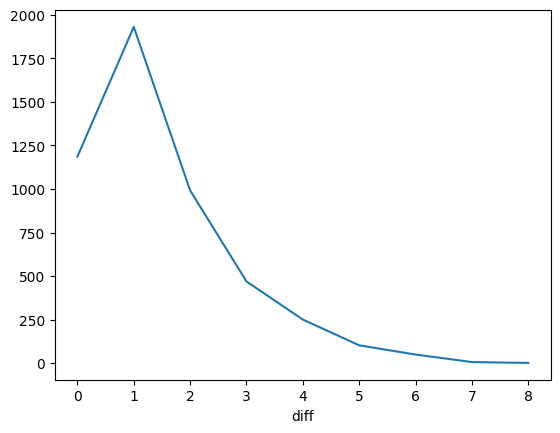

In [384]:
predictions["diff"].round().value_counts().sort_index().plot()

<Axes: xlabel='datetime'>

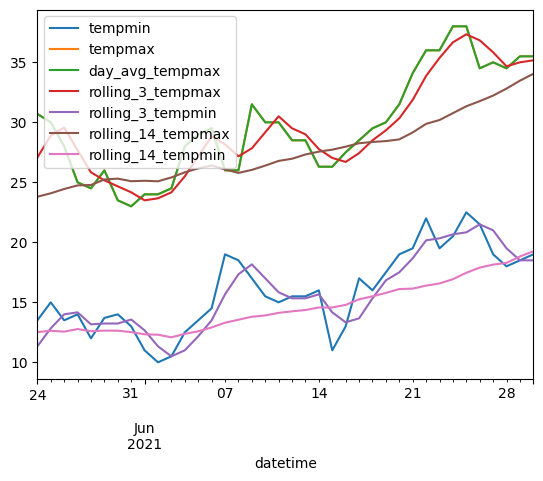

In [398]:
weather[['tempmin', 'tempmax','day_avg_tempmax', "rolling_3_tempmax", "rolling_3_tempmin","rolling_14_tempmax", "rolling_14_tempmin"]].loc["2021-05-24":"2021-06-30"].plot()

<Axes: xlabel='datetime'>

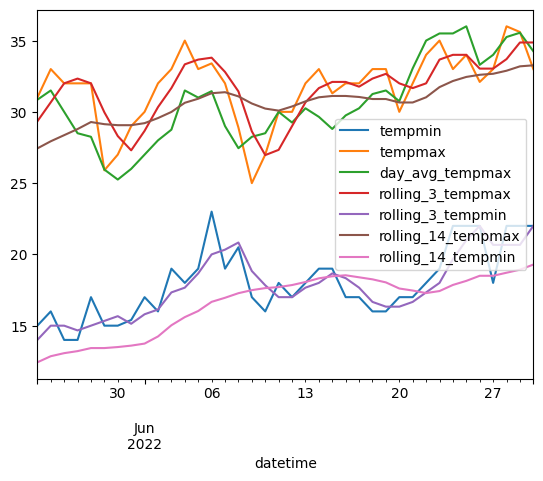

In [399]:
weather[['tempmin', 'tempmax','day_avg_tempmax', "rolling_3_tempmax", "rolling_3_tempmin","rolling_14_tempmax", "rolling_14_tempmin"]].loc["2022-05-24":"2022-06-30"].plot()

<Axes: xlabel='datetime'>

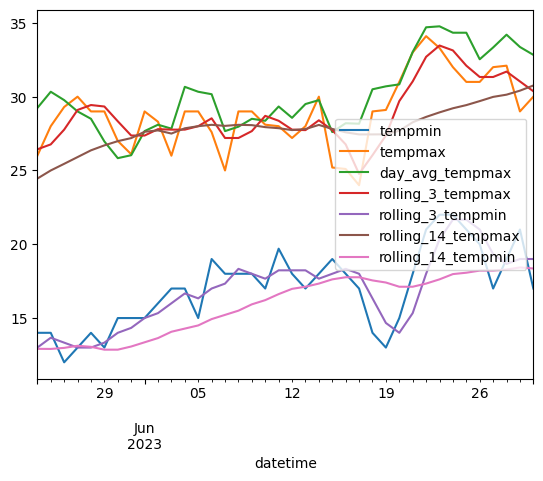

In [400]:
weather[['tempmin', 'tempmax','day_avg_tempmax', "rolling_3_tempmax", "rolling_3_tempmin","rolling_14_tempmax", "rolling_14_tempmin"]].loc["2023-05-24":"2023-06-30"].plot()